# Импорт библиотек

In [79]:
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 6, 6    # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True           # Сетка графика
plt.pink()                                 # Цветовая схема при раскраске

<Figure size 600x600 with 0 Axes>

# Функция Растригина

In [80]:
@njit
def f(x: np.ndarray):  # функция Растригина от -5.12 до 5.12
    a = 10
    result = 0
    n = len(x)
    for i in range(n):
        result += x[i] ** 2 - a * np.cos(2 * np.pi * x[i])

    return a * n + result

# Реализация метода роя частиц на Python с использованием numba

In [81]:
@njit
def main(v_max: float):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [82]:
list_of_all = main(1.9)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

global_best: 0.02199958388672485 coordinates: [-0.01053232]
Размерности совпадают:  True


[-3.3171182  -1.44064247 -5.07567205 -4.91238995 -3.74858923 -3.87873993
 -2.79095787 -5.08378839 -3.3248935   1.03565491 -3.28247578  2.03025601
 -4.53284553  1.53032032 -1.13956588 -0.42242317 -1.91053232 -3.5906499
 -4.37204588  2.05001167 -3.16435819  0.82581838 -4.62925219 -2.23975323
 -1.30678482 -2.71996857  0.34587204 -3.86596533 -2.5452372   0.41374432
 -4.15830301 -1.39021711 -2.54134078 -2.99945904 -0.1134615   0.91495134
  3.49755301  3.91060345  0.57232521  4.28734521 -3.28512287  1.92764642
  2.02489066 -3.44015841 -1.14721788 -1.39118132 -0.92831488  0.12231554
 -0.44100864 -3.73419792] 
 [2.01753882e+01 1.98867230e+01 1.21987503e+00 3.62886294e+00
 5.19842883e-01 1.20526644e+00 1.03430050e+00 1.37551882e+01
 1.78347943e+01 1.32247247e+00 1.93065258e+01 4.30209378e+00
 6.38881612e+00 2.21609616e+01 4.90337724e+00 1.90138377e+01
 2.19995839e-02 6.71826101e+00 1.64679577e+01 4.69220924e+00
 1.24995298e+01 6.09631546e+00 2.11833597e+00 1.43731158e+01
 1.52003642e+01 1.35224

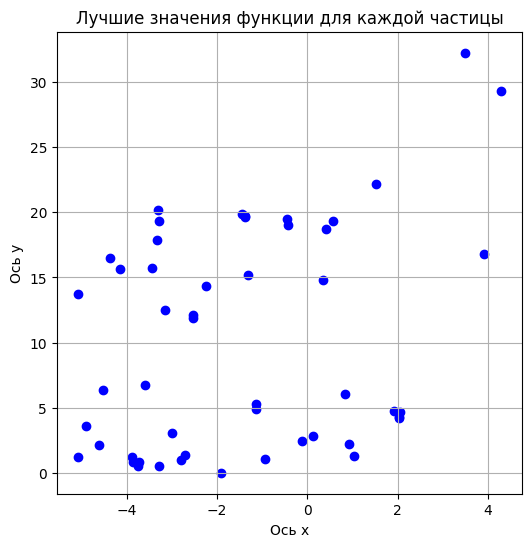

In [83]:
print(list_of_x, "\n", list_of_y)

plt.scatter(list_of_x, list_of_y, c = 'b', label = 'local min for each agent')
plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Лучшие значения функции для каждой частицы")
plt.show()

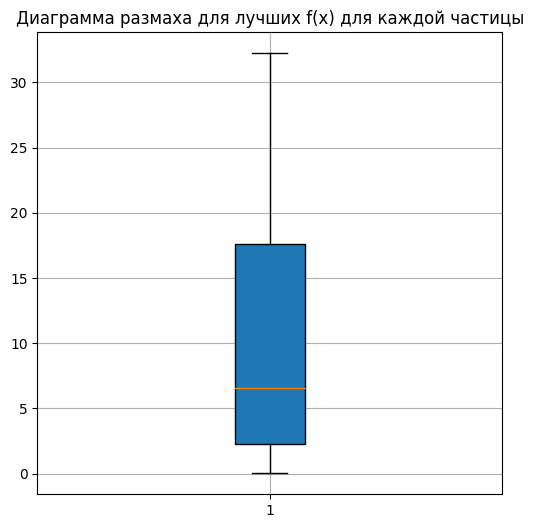

In [84]:
bp = plt.boxplot(list_of_y, patch_artist=True)  # диаграмма размаха для лучших f(x) для каждой частицы
plt.title("Диаграмма размаха для лучших f(x) для каждой частицы")
plt.show()

[ 0.4828818   0.45935753 -1.02866258 -1.02866258  0.05141077  0.05141077
  0.05141077  0.05141077  0.05141077  0.05141077  0.05141077  0.05141077
  0.05141077  0.05141077  0.05141077  0.05141077 -0.01053232 -0.01053232
 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232
 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232
 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232
 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232
 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232 -0.01053232
 -0.01053232 -0.01053232] 
 [20.17538823 19.88672304  1.21987503  1.21987503  0.51984288  0.51984288
  0.51984288  0.51984288  0.51984288  0.51984288  0.51984288  0.51984288
  0.51984288  0.51984288  0.51984288  0.51984288  0.02199958  0.02199958
  0.02199958  0.02199958  0.02199958  0.02199958  0.02199958  0.02199958
  0.02199958  0.02199958  0.02199958  0.02199958  0.02199958  0.02199958
  0.02199958  0.0219995

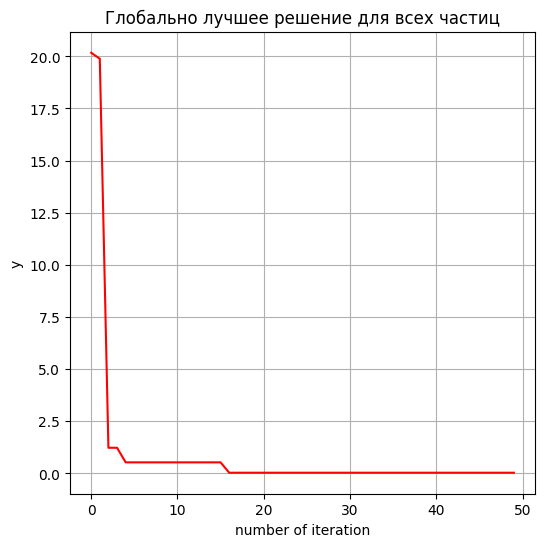

In [85]:
print(list_of_best_coord, "\n", list_of_best_solution)

plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution, c = 'r')
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.title("Глобально лучшее решение для всех частиц")
plt.show()

In [9]:
import ctypes
import os

class Result(ctypes.Structure):
    _fields_ = [
        ("best_solution", ctypes.POINTER(ctypes.c_float)),
        ("best_y", ctypes.c_float),
        ("time_spent", ctypes.c_double)
    ]

def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


#function_type = ctypes.CFUNCTYPE(ctypes.POINTER(ctypes.c_float), ctypes.c_float, ctypes.c_double)

test_rastrigin = c("libcode.dll", "test_rastrigin", (ctypes.c_int,), Result)

dimension = 2

result = test_rastrigin(dimension)
print("best:", result.best_y)
print("Time is", result.time_spent)
# print(result.best_solution[0])
best_solution = [result.best_solution[i] for i in range(dimension - 1)]

print("Coordinates:", best_solution)


best: 2.86102294921875e-06
Time is 0.023
Coordinates: [0.00012421607971191406]
